In [ ]:
Abhijeet KAnk Assignment Heart

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
url='C:/Users/ADMIN/Desktop/Abhijeet/Heart.csv'
df=pd.read_csv('Heart.csv')
df1=pd.read_csv(url)

In [5]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [10]:
#data cleaning

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [12]:
df['sex'] = df['sex'].astype('object')
df['cp'] = df['cp'].astype('object')
df['fbs'] = df['fbs'].astype('object')
df['restecg'] = df['restecg'].astype('object')
df['exang'] = df['exang'].astype('object')
df['slope'] = df['slope'].astype('object')
df['ca'] = df['ca'].astype('object')
df['thal'] = df['thal'].astype('object')
df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target        int64
dtype: object

In [13]:
df.isnull()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1021,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1022,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1023,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

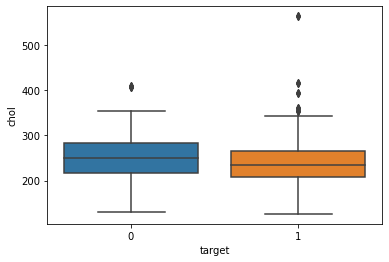

In [7]:
fig = plt.figure()
bxplt=sns.boxplot(x='target',y='chol',data=df1)
plt.show()
fig.savefig("box.png")

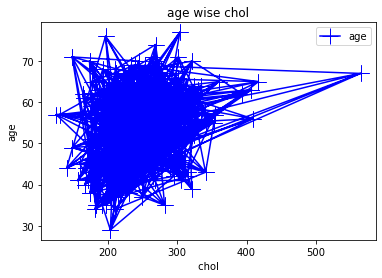

In [8]:
import matplotlib.pyplot as plt
df1.plot(x='chol',y='age',marker='+',color='blue',markersize=16)
plt.xlabel(" chol ")
plt.ylabel("age")
plt.title("age wise chol")
plt.show()

<AxesSubplot:>

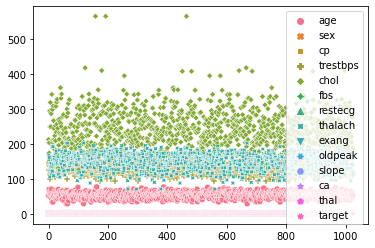

In [9]:
sns.scatterplot(data=df1)

In [21]:

continous_features = ['age','trestbps','chol','thalach','oldpeak']
def outliers(df_out, drop = False):
    for each_feature in df_out.columns:
        feature_data = df_out[each_feature]
        Q1 = np.percentile(feature_data, 25.) 
        Q3 = np.percentile(feature_data, 75.) 
        IQR = Q3-Q1 
        outlier_step = IQR * 1.5 
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()
        if not drop:
            print('For the feature {}, No of Outliers is {}'.format(each_feature, len(outliers)))
        if drop:
            df.drop(outliers, inplace = True, errors = 'ignore')
            print('Outliers from {} feature removed'.format(each_feature))
outliers(df[continous_features])

For the feature age, No of Outliers is 0
For the feature trestbps, No of Outliers is 30
For the feature chol, No of Outliers is 16
For the feature thalach, No of Outliers is 4
For the feature oldpeak, No of Outliers is 7


In [22]:
outliers(df[continous_features],drop=True)


Outliers from age feature removed
Outliers from trestbps feature removed
Outliers from chol feature removed
Outliers from thalach feature removed
Outliers from oldpeak feature removed


In [23]:
outliers(df[continous_features],drop=True)

Outliers from age feature removed
Outliers from trestbps feature removed
Outliers from chol feature removed
Outliers from thalach feature removed
Outliers from oldpeak feature removed


In [24]:
#duplicate


In [29]:
duplicated=df.duplicated().sum()

In [30]:
duplicated

678

In [27]:
if duplicated:
 print("Duplicated rows :{}".format(duplicated))
else:
 print("No duplicates")

Duplicated rows :678


In [28]:
duplicates=df[df.duplicated(keep=False)]
duplicates.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,Male,typical_angina,125,212,False,1,168,No,1.0,downsloping,2,normal,No_disease
1,53,Male,typical_angina,140,203,True,0,155,Yes,3.1,upsloping,0,normal,No_disease
2,70,Male,typical_angina,145,174,False,1,125,Yes,2.6,upsloping,0,normal,No_disease
3,61,Male,typical_angina,148,203,False,1,161,No,0.0,downsloping,1,normal,No_disease
4,62,Female,typical_angina,138,294,True,1,106,No,1.9,flat,3,reversable_defect,No_disease


In [31]:
df.drop_duplicates()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,Male,typical_angina,125,212,False,1,168,No,1.0,downsloping,2,normal,No_disease
1,53,Male,typical_angina,140,203,True,0,155,Yes,3.1,upsloping,0,normal,No_disease
2,70,Male,typical_angina,145,174,False,1,125,Yes,2.6,upsloping,0,normal,No_disease
3,61,Male,typical_angina,148,203,False,1,161,No,0.0,downsloping,1,normal,No_disease
4,62,Female,typical_angina,138,294,True,1,106,No,1.9,flat,3,reversable_defect,No_disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,Female,non-anginal pain,120,211,False,0,115,No,1.5,flat,0,reversable_defect,Disease
733,44,Female,non-anginal pain,108,141,False,1,175,No,0.6,flat,0,reversable_defect,Disease
739,52,Male,typical_angina,128,255,False,1,161,Yes,0.0,downsloping,1,normal,No_disease
843,59,Male,asymtomatic,160,273,False,0,125,No,0.0,downsloping,0,reversable_defect,No_disease


In [32]:
duplicates.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,Male,typical_angina,125,212,False,1,168,No,1.0,downsloping,2,normal,No_disease
1,53,Male,typical_angina,140,203,True,0,155,Yes,3.1,upsloping,0,normal,No_disease
2,70,Male,typical_angina,145,174,False,1,125,Yes,2.6,upsloping,0,normal,No_disease
3,61,Male,typical_angina,148,203,False,1,161,No,0.0,downsloping,1,normal,No_disease
4,62,Female,typical_angina,138,294,True,1,106,No,1.9,flat,3,reversable_defect,No_disease


In [33]:
duplicates.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,Male,typical_angina,125,212,False,1,168,No,1.0,downsloping,2,normal,No_disease
1,53,Male,typical_angina,140,203,True,0,155,Yes,3.1,upsloping,0,normal,No_disease
2,70,Male,typical_angina,145,174,False,1,125,Yes,2.6,upsloping,0,normal,No_disease
3,61,Male,typical_angina,148,203,False,1,161,No,0.0,downsloping,1,normal,No_disease
4,62,Female,typical_angina,138,294,True,1,106,No,1.9,flat,3,reversable_defect,No_disease


In [34]:
df.drop_duplicates()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,Male,typical_angina,125,212,False,1,168,No,1.0,downsloping,2,normal,No_disease
1,53,Male,typical_angina,140,203,True,0,155,Yes,3.1,upsloping,0,normal,No_disease
2,70,Male,typical_angina,145,174,False,1,125,Yes,2.6,upsloping,0,normal,No_disease
3,61,Male,typical_angina,148,203,False,1,161,No,0.0,downsloping,1,normal,No_disease
4,62,Female,typical_angina,138,294,True,1,106,No,1.9,flat,3,reversable_defect,No_disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,Female,non-anginal pain,120,211,False,0,115,No,1.5,flat,0,reversable_defect,Disease
733,44,Female,non-anginal pain,108,141,False,1,175,No,0.6,flat,0,reversable_defect,Disease
739,52,Male,typical_angina,128,255,False,1,161,Yes,0.0,downsloping,1,normal,No_disease
843,59,Male,asymtomatic,160,273,False,0,125,No,0.0,downsloping,0,reversable_defect,No_disease


In [35]:
duplicated=df.duplicated().sum()

In [36]:
duplicated

678

In [37]:
#data integration

In [43]:
dataset1='Student.csv'
dataset2 ='Mark.csv'


<AxesSubplot:xlabel='age', ylabel='thalach'>

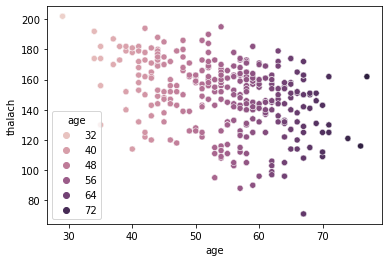

In [10]:
sns.scatterplot(x='age',y='thalach',data=df1,hue='age')

<AxesSubplot:xlabel='age', ylabel='thalach'>

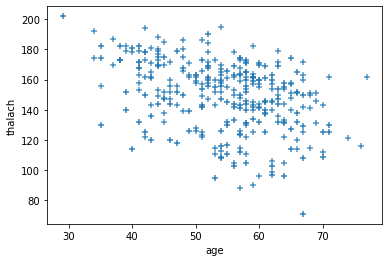

In [11]:
sns.scatterplot(x='age',y='thalach',data=df1,marker='+')

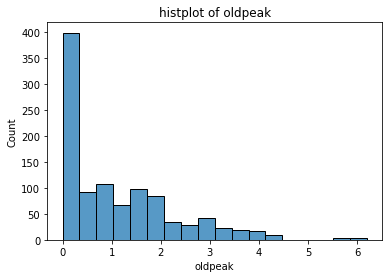

In [12]:
ax=sns.histplot(x='oldpeak',data=df1)
ax.set_title("histplot of oldpeak")
plt.show()

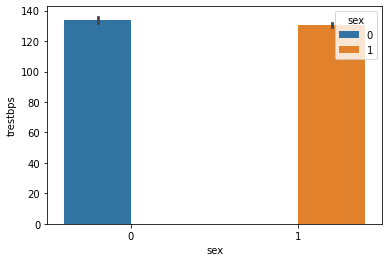

In [13]:
barplot=sns.barplot(x='sex',y='trestbps',data=df1,hue='sex')
plt.show()

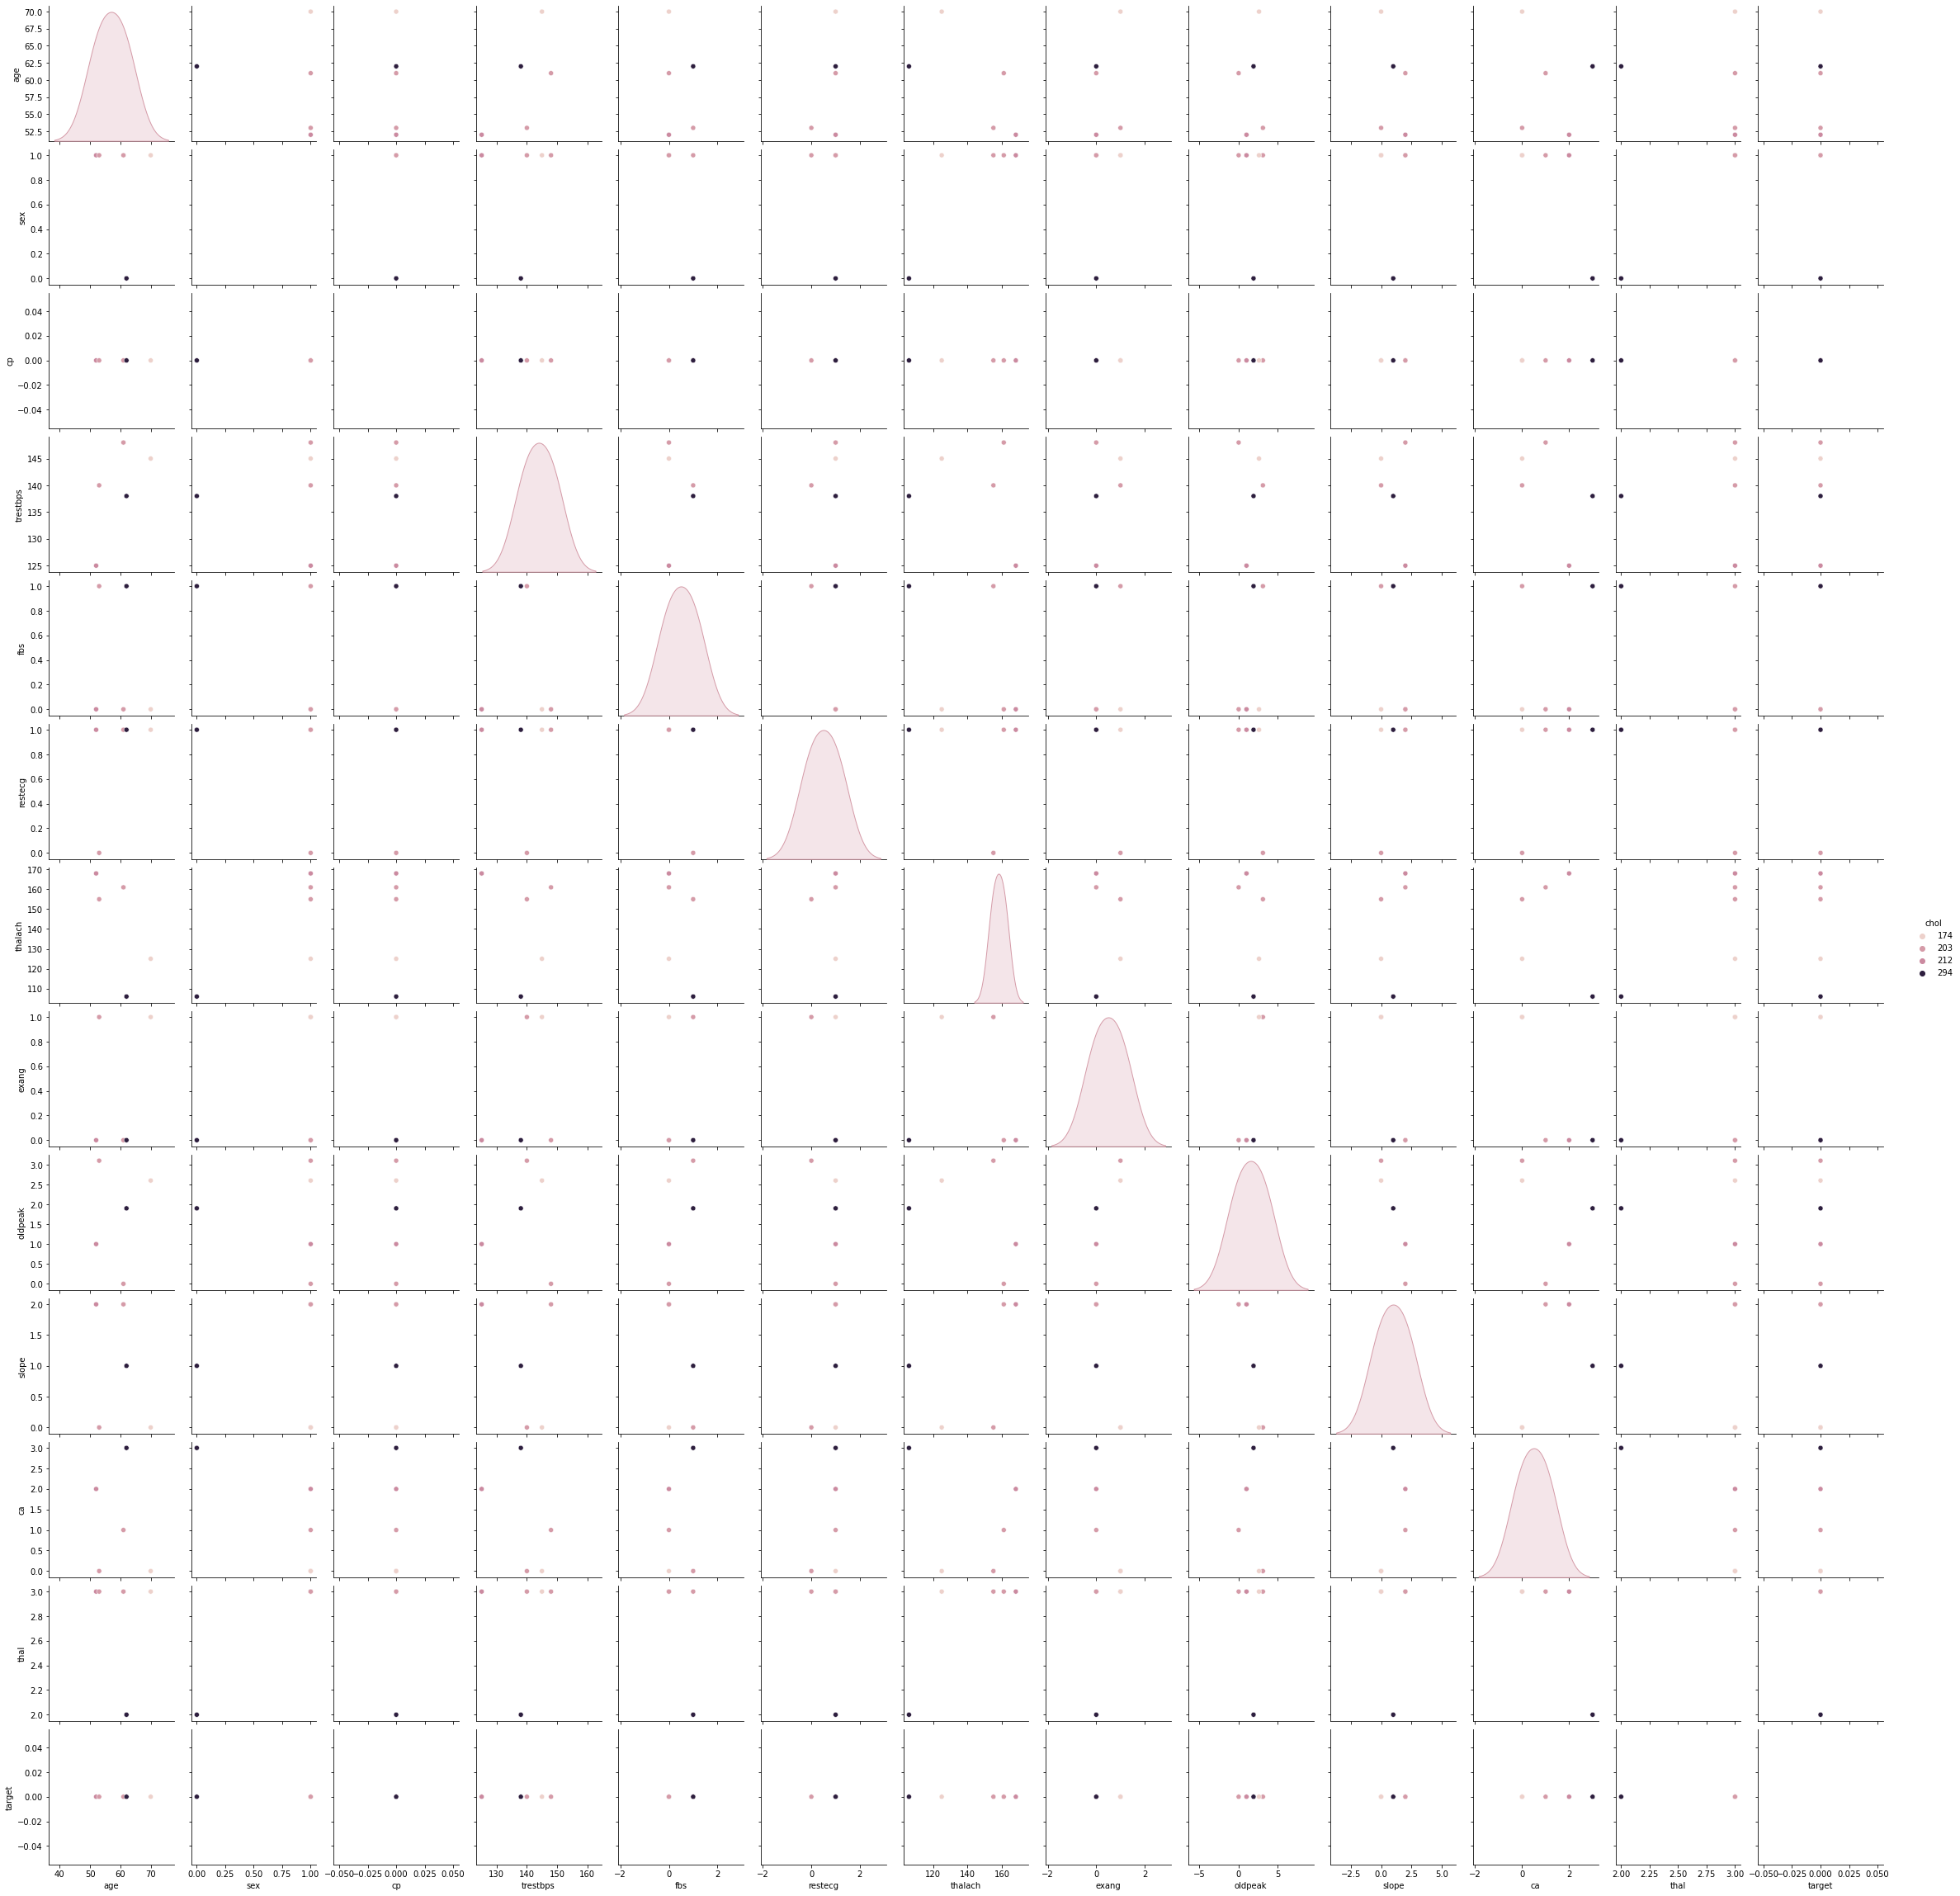

In [22]:
data = pd.read_csv("Heart.csv")
sns.pairplot(data.head(), hue = 'chol')